### Laboratorio 1
#### Mario Eduardo Tabarini Andretta
#### 22000349

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

### Problema #1:
#### Desarrolle una funci´on que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

In [18]:
def escala_grises(image_path, color):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 
    if img is None:
        print("Error, link a imagen incorrecto.")
        return
    
    alto=img.shape[0]
    ancho=img.shape[1]
    
    x = np.arange(0, ancho, 1)
    y = np.arange(0, alto, 1)
    x, y = np.meshgrid(x, y)
    z = img.flatten()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    
    ax.plot_surface(x, y, img, cmap=color)
    
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensidad')
    
    plt.show()

Sistema de procesamiento de imágenes


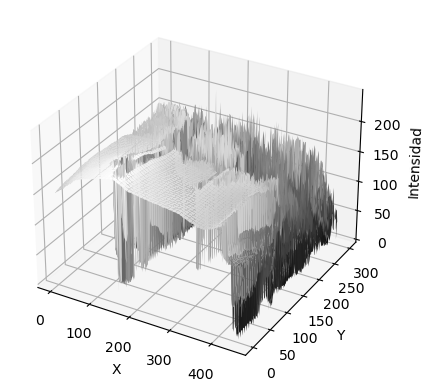

In [34]:
print("Sistema de procesamiento de imágenes")
image_path=input("Por favor ingresar la ruta de la imagen que se desea cargar.")
escala_grises(image_path, 'gray')

### Problema #2:
#### Implemente una función para cada una de las transformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

#### Función negativa:

In [35]:
def transformacion_negativa(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        print("Error, link a imagen incorrecto.")
        return
    
    negative = 255 - image

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    
    plt.subplot(1, 2, 2)
    plt.imshow(negative)
    plt.title('Transformación negativa')
    
    plt.show()
    

Sistema de procesamiento de imágenes a negativo


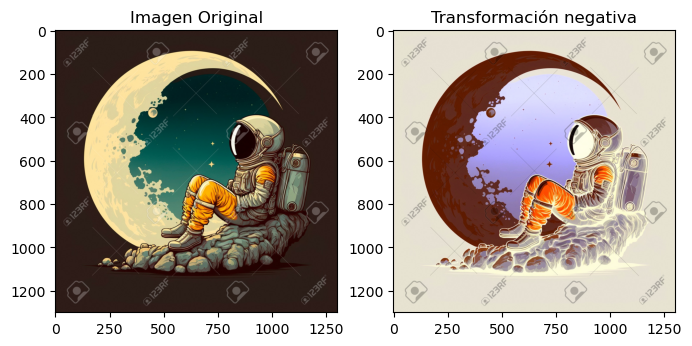

In [36]:
print("Sistema de procesamiento de imágenes a negativo")
image_path=input("Por favor ingresar la ruta de la imagen que se desea cargar.")
transformacion_negativa(image_path)

### Transformación lineal:

In [22]:
def transformacion_lineal(image_path, slope, intercept):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        print("Error, link a imagen incorrecto.")
        return
    
    slope=float(slope)
    intercept=float(intercept)

    linear = slope * image + intercept
    linear = np.clip(linear, 0, 255).astype(np.uint8)
    
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    
    plt.subplot(1, 2, 2)
    plt.imshow(linear)
    plt.title('Transformación lineal')
    
    plt.show()

Sistema de procesamiento de imágenes a lineal


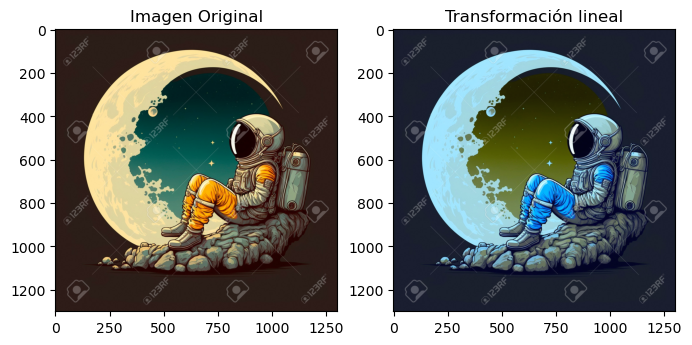

In [37]:
print("Sistema de procesamiento de imágenes a lineal")
image_path=input("Por favor ingresar la ruta de la imagen que se desea cargar.")
slope=input("Por favor ingrese la pendiente deseada.")
intercept=input("Por favor ingrese el intercepto deseado.")
transformacion_lineal(image_path, slope, intercept)

### Tranformación logarítmica:

In [24]:
def transformacion_logaritmica(image_path, c=1):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)  
    if image is None:
        print("Error, link a imagen incorrecto.")
        return
    
    normalizada = image / 255.0
    
    logaritmic = c * np.log1p(normalizada)
    logaritmic = np.clip(logaritmic, 0, 1)
    logaritmic = (logaritmic * 255).astype(np.uint8)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    
    plt.subplot(1, 2, 2)
    plt.imshow(logaritmic)
    plt.title('Transformación logarítmica')
    
    plt.show()

Sistema de procesamiento de imágenes a logarítmica


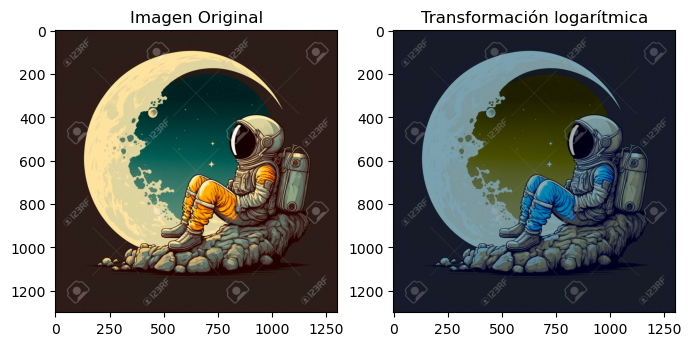

In [38]:
print("Sistema de procesamiento de imágenes a logarítmica")
image_path=input("Por favor ingresar la ruta de la imagen que se desea cargar.")
transformacion_logaritmica(image_path)

### Transformación exponencial:

In [26]:
def transformacion_exponencial(image_path, c=1):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        print("Error, link a imagen incorrecto.")
        return
    
    exponencial = c * (np.exp(image) - 1)
    exponencial = np.clip(exponencial, 0, 255).astype(np.uint8)


    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    
    plt.subplot(1, 2, 2)
    plt.imshow(exponencial)
    plt.title('Transformación exponencial')
    
    plt.show()

Sistema de procesamiento de imágenes a exponencial


C:\Users\Mario T\AppData\Local\Temp\ipykernel_9192\1239229961.py:7: RuntimeWarning: overflow encountered in exp
  exponencial = c * (np.exp(image) - 1)


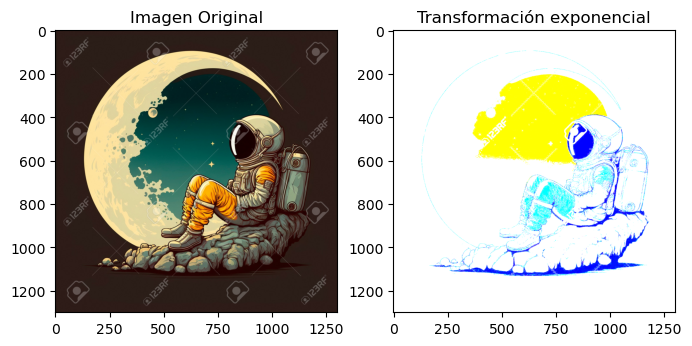

In [27]:
print("Sistema de procesamiento de imágenes a exponencial")
image_path=input("Por favor ingresar la ruta de la imagen que se desea cargar.")
transformacion_exponencial(image_path)

### Problema #3:
#### Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

In [28]:
def operaciones_logicas(image_path_1, image_path_2):
    image = cv2.imread(image_path_1, cv2.IMREAD_GRAYSCALE)
    image_2 = cv2.imread(image_path_2, cv2.IMREAD_GRAYSCALE)

    if image is None or image_2 is None:
        print("Error, link a imagen incorrecto.")
        return
        
    width = 1000  
    height = 700  
    
    image1_resized = cv2.resize(image, (width, height))
    image2_resized = cv2.resize(image_2, (width, height))


    _, image_bin = cv2.threshold(image1_resized, 128, 255, cv2.THRESH_BINARY)
    _, image_2_bin = cv2.threshold(image2_resized, 128, 255, cv2.THRESH_BINARY)
    

    
    suma_bin = cv2.add(image_bin, image_2_bin)
    resta_bin = cv2.subtract(image_bin, image_2_bin)
    and_bin = cv2.bitwise_and(image_bin, image_2_bin)
    or_bin = cv2.bitwise_or(image_bin, image_2_bin)
    xor_bin = cv2.bitwise_xor(image_bin, image_2_bin)
    

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 5, 1)
    plt.imshow(suma_bin, cmap='gray')
    plt.title('Suma')
    
    plt.subplot(1, 5, 2)
    plt.imshow(resta_bin, cmap='gray')
    plt.title('Resta')

    plt.subplot(1, 5, 3)
    plt.imshow(and_bin, cmap='gray')
    plt.title('And')

    plt.subplot(1, 5, 4)
    plt.imshow(or_bin, cmap='gray')
    plt.title('Or')

    plt.subplot(1, 5, 5)
    plt.imshow(xor_bin, cmap='gray')
    plt.title('Xor')

    
    plt.show()

Sistema de operaciones lógicas de imágenes


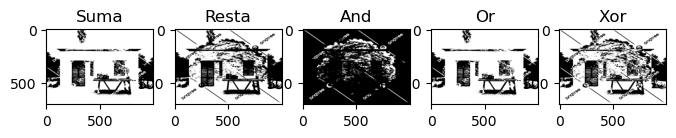

In [29]:
print("Sistema de operaciones lógicas de imágenes")
image_path_1=input("Por favor ingresar la ruta de la primera imagen que se desea cargar.")
image_path_2=input("Por favor ingresar la ruta de la segunda imagen que se desea cargar.")
operaciones_logicas(image_path_1, image_path_2)

### Problema #4:
#### Realice una comparación entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV y cualquier imagen, como entregable debe mostrar una comparación entre los tres enfoques con una tabla donde se muestre las ventajas y desventajas de cada enfoque.

In [30]:
def comparacion_bordes(image_path_1):
    image = cv2.imread(image_path_1, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Error, link a imagen incorrecto.")
        return

    canny_edges = cv2.Canny(image, 100, 200)
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Imagen original')

    plt.subplot(2, 3, 2)
    plt.imshow(canny_edges, cmap='gray')
    plt.title('Canny')

    plt.subplot(2, 3, 3)
    plt.imshow(sobel_x, cmap='gray')
    plt.title('Sobel X')

    plt.subplot(2, 3, 4)
    plt.imshow(sobel_y, cmap='gray')
    plt.title('Sobel Y')

    plt.subplot(2, 3, 5)
    plt.imshow(laplacian, cmap='gray')
    plt.title('Laplaciano')

    plt.show()

    print("Comparación de enfoques para detección de bordes:")
    print("-------------------------------------------------")
    print("Canny:")
    print("  Ventajas: Detección de bordes finos eficiente")
    print("  Desventajas: La presencia de ruido puede perjudicar su eficiencia")
    print("\nSobel:")
    print("  Ventajas: Alta determinación de sus gradientes")
    print("  Desventajas: No detecta bordes en todas las direcciones")
    print("\nLaplaciano:")
    print("  Ventajas: Funciona bien en bordes gruesos")
    print("  Desventajas: No distingue  dirección del borde")

Sistema de comparación entre métodos de detección de bordes.


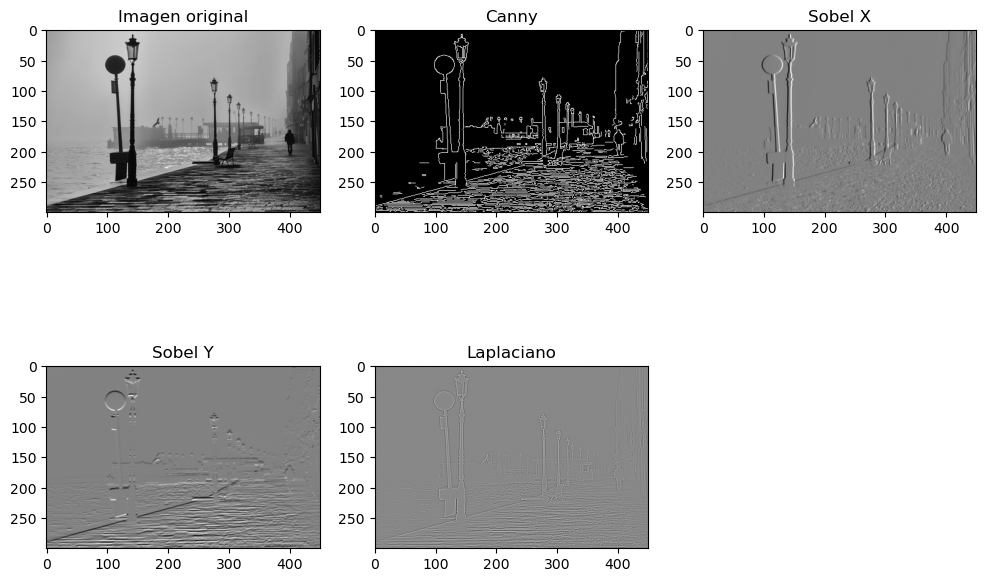

Comparación de enfoques para detección de bordes:
-------------------------------------------------
Canny:
  Ventajas: Detección de bordes finos eficiente
  Desventajas: La presencia de ruido puede perjudicar su eficiencia

Sobel:
  Ventajas: Alta determinación de sus gradientes
  Desventajas: No detecta bordes en todas las direcciones

Laplaciano:
  Ventajas: Funciona bien en bordes gruesos
  Desventajas: No distingue  dirección del borde


In [31]:
print("Sistema de comparación entre métodos de detección de bordes.")
image_path_1=input("Por favor ingresar la ruta de la primera imagen que se desea cargar.")
comparacion_bordes(image_path_1)

### Problema #5:
### Utilizando funciones de OpenCV deberá aplicar los filtros de convolución de tamaño de kernel (3x3, 5x5 y 7x7) las operaciones que deberá realizar son las siguientes:
#### Kernel Gaussiano de riodo.
#### Kernel Box de ruido.
#### Kernel de mediana para ruido.
#### Kernel Sobel para detección de bornes (en X e Y).
#### Kernel Lapaciano para detecci´on de bordes.
#### Kernel de realce (Sharpening).
#### Kernel de relieve (Embossing)

In [32]:
def convolucion(image_path_1):
    image = cv2.imread(image_path_1, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Error, link a imagen incorrecto.")
        return 
    
    tamaño_kernel = [3, 5, 7]

    gaussian_results = []
    box_results = []
    sharpening_results = []
    embossing_results = []
    sobel_x_results = []
    sobel_y_results = []

    for size in tamaño_kernel:
        gaussian_kernel = cv2.getGaussianKernel(size, size/5) 
        box_kernel = np.ones((size, size), np.float32) / (size * size) 
        sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 
        embossing_kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])  
        sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  
        sobel_y_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) 
        
        gaussian_result = cv2.filter2D(image, -1, gaussian_kernel)
        box_result = cv2.filter2D(image, -1, box_kernel)
        sharpening_result = cv2.filter2D(image, -1, sharpening_kernel)
        embossing_result = cv2.filter2D(image, -1, embossing_kernel)
        sobel_x_result = cv2.filter2D(image, -1, sobel_x_kernel)
        sobel_y_result = cv2.filter2D(image, -1, sobel_y_kernel)
        
        gaussian_results.append(gaussian_result)
        box_results.append(box_result)
        sharpening_results.append(sharpening_result)
        embossing_results.append(embossing_result)
        sobel_x_results.append(sobel_x_result)
        sobel_y_results.append(sobel_y_result)

    plt.figure(figsize=(18, 24))
    plt.rcParams.update({'font.size': 10})

    for i in range(len(tamaño_kernel)):

        plt.subplot(len(tamaño_kernel), 6, i*6 + 1), plt.imshow(gaussian_results[i], cmap='gray')
        plt.title(f'Gaussiano (tamaño {tamaño_kernel[i]})')

        plt.subplot(len(tamaño_kernel), 6, i*6 + 2), plt.imshow(box_results[i], cmap='gray')
        plt.title(f'Box (tamaño {tamaño_kernel[i]})')

        plt.subplot(len(tamaño_kernel), 6, i*6 + 3), plt.imshow(sharpening_results[i], cmap='gray')
        plt.title(f'Sharpening (tamaño {tamaño_kernel[i]})')

        plt.subplot(len(tamaño_kernel), 6, i*6 + 4), plt.imshow(embossing_results[i], cmap='gray')
        plt.title(f'Embossing (tamaño {tamaño_kernel[i]})')

        plt.subplot(len(tamaño_kernel), 6, i*6 + 5), plt.imshow(sobel_x_results[i], cmap='gray')
        plt.title(f'Sobel X (tamaño {tamaño_kernel[i]})')

        plt.subplot(len(tamaño_kernel), 6, i*6 + 6), plt.imshow(sobel_y_results[i], cmap='gray')
        plt.title(f'Sobel Y (tamaño {tamaño_kernel[i]})')
            
    
    plt.subplots_adjust(hspace=0.5)
    plt.show()

Sistema de filtros de convolución.


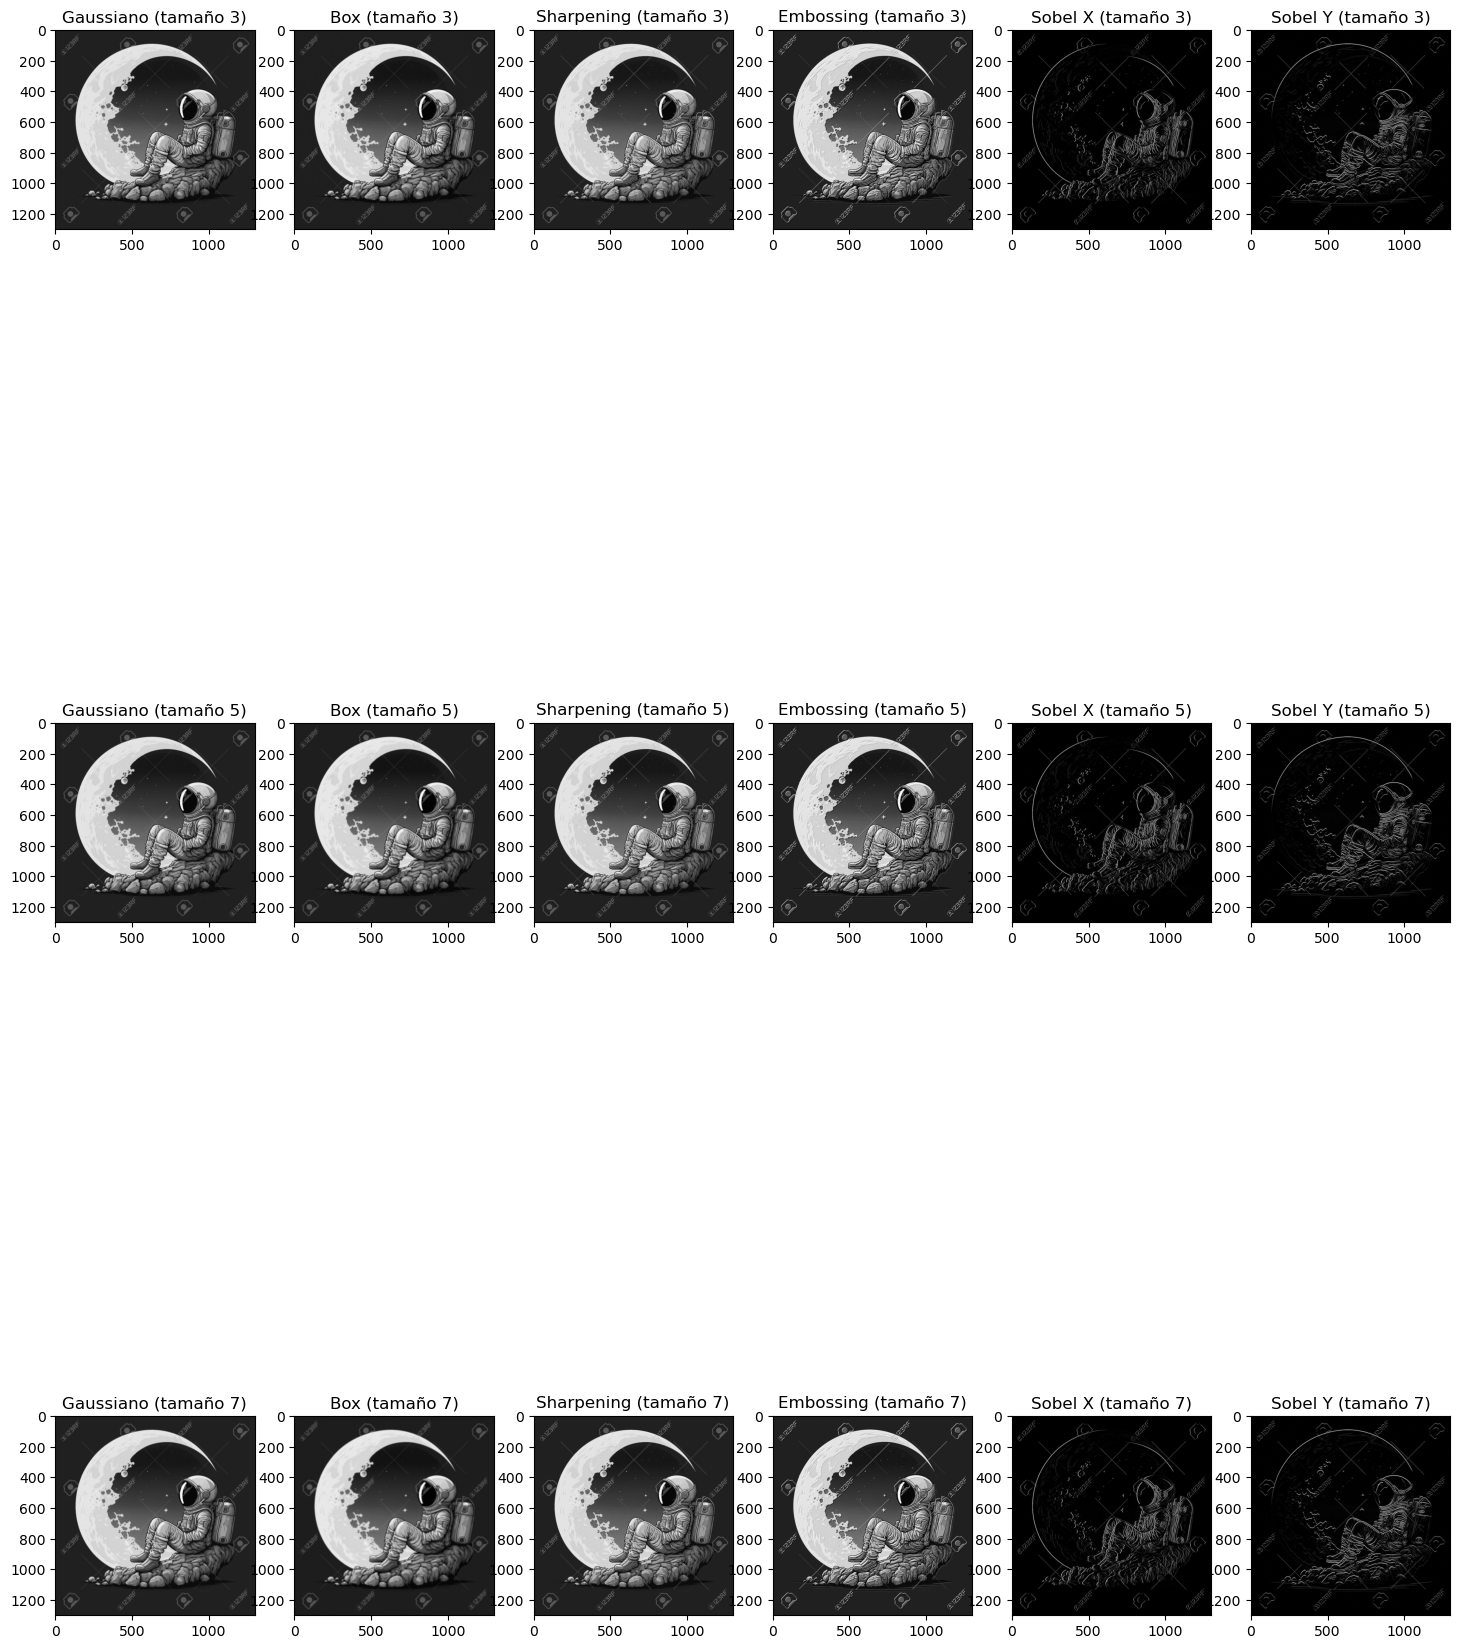

In [33]:
print("Sistema de filtros de convolución.")
image_path_1=input("Por favor ingresar la ruta de la imagen que se desea cargar.")
convolucion(image_path_1)